In [18]:
import pandas as pd
import numpy as np
import random
from tensorflow.keras.layers import Conv2D, Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = tf.image.per_image_standardization(x_train)
x_test = tf.image.per_image_standardization(x_test)
IMAGE_SIZE = 28
x_test = np.array(x_test).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
x_train = np.array(x_train).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)

In [3]:
pool_NN = pd.read_csv("genome_Seq_CNN.csv")
pool_NN

,Unnamed: 0,Model No.,genome,Parameters,Training Accuracy,Validation Accuracy,Test Accuracy
0,0,1,RC 52 2 sigmoid; NC 28 2 swish ;RC 52 2 sigmoi...,20346.0,0.825542,0.832833,0.8280
1,1,2,RC 16 2 tanh; NC 96 2 sigmoid ;RC 16 2 tanh ;N...,25578.0,0.787500,0.801083,0.7925
2,2,3,RC 76 2 sigmoid; NC 16 2 tanh ;RC 76 2 sigmoid...,16818.0,0.810812,0.814833,0.7903
3,3,4,RC 96 2 tanh; NC 72 2 swish ;RC 96 2 tanh ;NC ...,88986.0,0.880833,0.871833,0.8572
4,4,5,RC 24 2 gelu; NC 100 2 sigmoid ;RC 24 2 gelu ;...,36258.0,0.832563,0.831250,0.8309
...,...,...,...,...,...,...,...
95,95,96,RC 112 2 relu; NC 56 2 gelu ;RC 112 2 relu ;NC...,80346.0,0.889125,0.882333,0.8731
96,96,97,RC 56 2 gelu; NC 84 2 swish ;RC 56 2 gelu ;NC ...,63042.0,0.900937,0.893250,0.8848
97,97,98,RC 72 2 relu; NC 56 2 gelu ;RC 72 2 relu ;NC 5...,53226.0,0.892458,0.892000,0.8856
98,98,99,RC 16 2 gelu; NC 64 2 sigmoid ;RC 16 2 gelu ;N...,17322.0,0.800104,0.806583,0.8029


In [4]:
def get_max_parameter():
    max_parm = max(pool_NN.iloc[:,3])
    return max_parm

We will now try to comeup with a fitness function which shows max acc with less no of parameter

In [5]:
no_of_best_genome = 5

In [6]:
def fitness_func(no_param,test_acc):
    max_parm = get_max_parameter()
    return test_acc - (no_param/max_parm)

In [7]:
def Nmaxelements(list1, N):
    final_list = []
    index = []
  
    for i in range(0, N): 
        max1 = 0
        ind = 0
          
        for j in range(len(list1)):     
            if list1[j] > max1:
                max1 = list1[j]
                ind = j
                
                  
        list1.remove(max1)
        final_list.append(max1)
        index.append(ind)
          
    return final_list,index

In [8]:
pool_NN.iloc[7,2]


'RC 124 2 tanh; NC 112 2 tanh ;RC 124 2 tanh ;NC 112 2 tanh ;FL sigmoid'

In [9]:
def Decode_Genome(genome):
    RC_layer1,NC_layer2,_,_,FL_layer5 = genome.split(';')
    #print(RC_layer1,"\n",NC_layer2,"\n",FL_layer5)
        
    #Decoding RC Layer
    #print(RC_layer1)
    temp_RC_f = RC_layer1.split("RC",1)[1]
    temp_RC_acti = RC_layer1.split(" 2 ",1)[1]

    temp_RC_f = temp_RC_f.split(" 2 ",1)[0]
    temp_RC_f = int(temp_RC_f)
    temp_RC_acti = str(temp_RC_acti)

    #Decoding NC layer
    temp_NC_f = NC_layer2.split("NC",1)[1]
    temp_NC_acti = NC_layer2.split(" 2 ",1)[1]

    temp_NC_f = temp_NC_f.split(" 2 ",1)[0]
    temp_NC_f = int(temp_NC_f)
    temp_NC_acti = str(temp_NC_acti)

    #Decoding for FL layer
    temp_FL_acti = FL_layer5.split('FL',1)[1]
    temp_FL_acti = str(temp_FL_acti)

    return temp_RC_f,temp_RC_acti,temp_NC_f,temp_NC_acti,temp_FL_acti


In [10]:
def CrossOver(index_of_genomes):
    genome_Seq = []
    for i in range(no_of_best_genome):
        seq = pool_NN.iloc[i,2]
        genome_Seq.append(seq)  # Got the genome Seq of best performing CNN as per our fitness function
    #print(genome_Seq)
    # Get the RC & NC filters and various activation functions
    RC_filters = []
    NC_filters = []
    RC_activation = []
    NC_activation  = []
    FL_activation = []
    for genome in genome_Seq:
        RC_layer1,NC_layer2,_,_,FL_layer5 = genome.split(';')
        #print(RC_layer1,"\n",NC_layer2,"\n",FL_layer5)
        
        #Decoding RC Layer
        #print(RC_layer1)
        temp_RC_f = RC_layer1.split("RC",1)[1]
        temp_RC_acti = RC_layer1.split(" 2 ",1)[1]
        #print(temp_RC_acti)
        temp_RC_f = temp_RC_f.split(" 2 ",1)[0]
        RC_filters.append(int(temp_RC_f))
        RC_activation.append(str(temp_RC_acti))

        #Decoding NC layer
        temp_NC_f = NC_layer2.split("NC",1)[1]
        temp_NC_acti = NC_layer2.split(" 2 ",1)[1]
        #print(temp_RC_acti)
        temp_NC_f = temp_NC_f.split(" 2 ",1)[0]
        NC_filters.append(int(temp_NC_f))
        NC_activation.append(str(temp_NC_acti))

        #Decoding for FL layer
        temp_FL_acti = FL_layer5.split('FL',1)[1]
        FL_activation.append(temp_FL_acti)

    '''print(RC_filters)
    print(RC_activation)
    print(NC_filters)
    print(NC_activation)
    print(FL_activation)'''

    RC_filters = np.array(RC_filters)
    RC_activation = np.array(RC_activation)
    NC_filters = np.array(NC_filters)
    NC_activation = np.array(NC_activation)
    FL_activation = np.array(FL_activation)

    RC_filters = np.unique(RC_filters)
    RC_activation = np.unique(RC_activation)
    NC_filters = np.unique(NC_filters)
    NC_activation = np.unique(NC_activation)
    FL_activation = np.unique(FL_activation)

    RC_filters = list(RC_filters)
    RC_activation = list(RC_activation)
    NC_filters = list(NC_filters)
    NC_activation = list(NC_activation)
    FL_activation = list(FL_activation)
    '''print(RC_filters)
    print(RC_activation)
    print(NC_filters)
    print(NC_activation)
    print(FL_activation)'''

    #Using Random Crossover to randomly create 5 genome Seq. using best performing variables
    crossed_genome = []
    for i in range(no_of_best_genome):
        RC_f = random.choice(RC_filters)
        NC_f = random.choice(NC_filters)
        RC_act = random.choice(RC_activation)
        NC_act = random.choice(NC_activation)
        FL_act = random.choice(FL_activation)

        genome = "RC "+str(RC_f)+" "+str(2)+" "+str(RC_act)+"; "+"NC "+str(NC_f)+" "+str(2)+" "+str(NC_act)+" ;"+"RC "+str(RC_f)+" "+str(2)+" "+str(RC_act)+" ;"+"NC "+str(NC_f)+" "+str(2)+" "+str(NC_act)+" ;"+"FL"+" "+str(FL_act)
        crossed_genome.append(genome)
    return crossed_genome

    
 

    
    

In [11]:
def Mutation(genome_Seq):
    
    mutated_genome = []

    for genome in genome_Seq:
        RC_f = random.choice([i for i in range(4,128,4)])
        NC_f = random.choice([i for i in range(4,128,4)])
        RC_act = random.choice(['relu','sigmoid','tanh','swish','gelu'])
        NC_act = random.choice(['relu','sigmoid','tanh','swish','gelu'])
        FL_act = random.choice(['relu','sigmoid','tanh','swish','gelu'])
        parametrs = [RC_f,NC_f,RC_act,NC_act,FL_act]
        mutation = random.sample(parametrs,1)
        mutation = mutation[0]
        
        if RC_f==mutation:      # Mutation in RC filter
            #print(RC_f," ",mutation)
            RC_layer,NC_layer,_,_,FL_layer = genome.split(';')
            temp_RC_f = RC_layer.split("RC",1)[1]
            temp_RC_acti = RC_layer.split(" 2 ",1)[1]
            temp_RC_f = temp_RC_f.split(" 2 ",1)[0]
            temp_RC_f = mutation
            genome = "RC "+str(temp_RC_f)+" "+str(2)+" "+str(temp_RC_acti)+"; "+str(NC_layer)+" ;"+"RC "+str(temp_RC_f)+" "+str(2)+" "+str(temp_RC_acti)+" ;"+str(NC_layer)+" ;"+str(FL_layer)
            mutated_genome.append(genome)
            
        elif NC_f==mutation:        # Mutation in NC Filter
            #print(NC_f," ",mutation)
            RC_layer,NC_layer,_,_,FL_layer = genome.split(';')
            temp_NC_f = NC_layer.split("NC",1)[1]
            temp_NC_acti = RC_layer.split(" 2 ",1)[1]
            temp_NC_f = temp_NC_f.split(" 2 ",1)[0]
            temp_NC_f = mutation
            genome = str(RC_layer)+"; "+"NC "+str(temp_NC_f)+" "+str(2)+" "+str(temp_NC_acti)+" ;"+str(RC_layer)+" ;"+"NC "+str(temp_NC_f)+" "+str(2)+" "+str(temp_NC_acti)+" ;"+str(FL_layer)
            mutated_genome.append(genome)

        elif RC_act==mutation:      # Muatation in RC Activation Function
            #print(RC_act," ",mutation)
            RC_layer,NC_layer,_,_,FL_layer = genome.split(';')
            temp_RC_f = RC_layer.split("RC",1)[1]
            temp_RC_acti = RC_layer.split(" 2 ",1)[1]
            temp_RC_f = temp_RC_f.split(" 2 ",1)[0]
            temp_RC_acti = str(mutation)
            genome = "RC "+str(temp_RC_f)+" "+str(2)+" "+str(temp_RC_acti)+"; "+str(NC_layer)+" ;"+"RC "+str(temp_RC_f)+" "+str(2)+" "+str(temp_RC_acti)+" ;"+str(NC_layer)+" ;"+str(FL_layer)
            mutated_genome.append(genome)
        
        elif NC_act==mutation:      # Muatation in NC Activation Function
            #print(NC_act," ",mutation)
            RC_layer,NC_layer,_,_,FL_layer = genome.split(';')
            temp_NC_f = NC_layer.split("NC",1)[1]
            temp_NC_acti = RC_layer.split(" 2 ",1)[1]
            temp_NC_f = temp_NC_f.split(" 2 ",1)[0]
            temp_NC_acti = str(mutation)
            genome = str(RC_layer)+"; "+"NC "+str(temp_NC_f)+" "+str(2)+" "+str(temp_NC_acti)+" ;"+str(RC_layer)+" ;"+"NC "+str(temp_NC_f)+" "+str(2)+" "+str(temp_NC_acti)+" ;"+str(FL_layer)
            mutated_genome.append(genome)
        
        elif FL_act==mutation:      # Muataion in FL Activation Function
            #print(FL_act," ",mutation)
            RC_layer,NC_layer,_,_,FL_layer = genome.split(';')
            temp_FL_acti = FL_layer.split('FL',1)[1]
            temp_FL_acti = mutation
            genome = str(RC_layer)+"; "+str(NC_layer)+" ;"+str(RC_layer)+" ;"+str(NC_layer)+" ;"+"FL"+" "+str(temp_FL_acti)
            mutated_genome.append(genome)
    return mutated_genome

Till Here we have got our Top 5 models and we have also performed Crossover and Muatation on the same.

In [12]:
def Test_genome_Efficacy(RC_f,RC_acti,NC_f,NC_acti,FL_acti):
    
    RC_acti = RC_acti.strip()
    NC_acti = NC_acti.strip()
    FL_acti = FL_acti.strip()
    print(RC_acti,NC_acti,FL_acti)

    model = Sequential()
    model.add(Conv2D(RC_f,kernel_size=(2,2) ,padding='valid',strides=2,input_shape=x_train.shape[1:])) #Reduction Layer
    model.add(Activation(activation = str(RC_acti)))

    model.add(Conv2D(NC_f,(2,2),padding='same')) 
    model.add(Activation(activation = str(NC_acti)))

    model.add(Conv2D(RC_f,kernel_size=(2,2) ,padding='valid',strides=2))  #Reduction Layer
    model.add(Activation(str(RC_acti)))

    model.add(Conv2D(NC_f,(2,2),padding='same')) 
    model.add(Activation(activation = str(NC_acti)))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(64))
    model.add(Activation(activation = str(FL_acti)))
    model.add(Dense(10))
    model.add(Activation("softmax"))

    trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    history = model.fit(x = x_train,y=y_train,epochs=8,validation_split=0.2,verbose = 0)
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    results = model.evaluate(x=x_test,y=y_test,verbose=0)
    test_acc = results[1]

    return trainableParams,max(train_acc),max(val_acc),test_acc



In [13]:
def AnaysleMutation(mutated_genome,current_model_count):
    fitness_score = []
    new_genomes = []
    for genome in mutated_genome:
        temp_RC_f,temp_RC_acti,temp_NC_f,temp_NC_acti,temp_FL_acti = Decode_Genome(genome=genome)
        print(temp_RC_f,temp_RC_acti,temp_NC_f,temp_NC_acti,temp_FL_acti)
        print("\n")
        trainableParams,train_acc,val_acc,test_acc = Test_genome_Efficacy(temp_RC_f,temp_RC_acti,temp_NC_f,temp_NC_acti,temp_FL_acti)
        # Updating my Model Population
        candidate = {
        "Model No.":current_model_count + 1,
        "genome":genome,
        "Parameters":trainableParams,
        "Training Accuracy":train_acc,
        "Validation Accuracy":val_acc,
        "Test Accuracy":test_acc

        }
        current_model_count+=1
        new_genomes.append(candidate)
        score = fitness_func(no_param=trainableParams,test_acc=test_acc)
        fitness_score.append(score)
    return fitness_score,new_genomes


In [14]:
count = 0
while(1):
  print("Working on ",len(pool_NN)," genomes")
  all_score = []
  for i in range(len(pool_NN)):
    param = pool_NN.iloc[i,3]
    test_acc = pool_NN.iloc[i,6]
    score = fitness_func(no_param=param,test_acc=test_acc)
    all_score.append(score)
  best_scores,best_performing_genome_index = Nmaxelements(all_score,N=no_of_best_genome)
  print(best_scores)
  best_score = max(best_scores)
  print(best_performing_genome_index)

  
  
  crossed_genome = CrossOver(best_performing_genome_index)
  mutated_genome = Mutation(crossed_genome)
  fitness_score_muatation,mutated_genomes = AnaysleMutation(mutated_genome=mutated_genome,current_model_count = pool_NN.iloc[-1,1])
  pool_NN = pool_NN.append(other=mutated_genomes)
  best_score_mutation = max(fitness_score_muatation)
  if count==50:
    index = best_performing_genome_index[0]
    best_genome = pool_NN.iloc[index,2]
  if abs(best_score_mutation - best_score)<=0.01:
    index = fitness_score_muatation.index(best_score_mutation)
    best_genome = mutated_genome[index]
    break
  print("Retrying!!!","    Best Score after muatation :- ",best_score_mutation,"   Best score  :- ",best_score)
  count+=1



Working on  100  genomes
[0.7944491902117745, 0.7885575138244102, 0.7805642348522407, 0.7717441867805579, 0.7630868616142761]
[91, 26, 75, 87, 71]
24 gelu 96 tanh     relu


gelu tanh relu
24 tanh 100 gelu    tanh


tanh gelu tanh
76 tanh 100 sigmoid     sigmoid


tanh sigmoid sigmoid
96 tanh 72 relu    tanh


tanh relu tanh
28 sigmoid 96 swish      tanh


sigmoid swish tanh
Retrying!!!     Best Score after muatation :-  0.6666087716820912    Best score  :-  0.7944491902117745
Working on  105  genomes
[0.7944491902117745, 0.7885575138244102, 0.7805642348522407, 0.7717441867805579, 0.7630868616142761]
[91, 26, 75, 87, 71]
24 tanh 100 tanh      sigmoid


tanh tanh sigmoid
24 tanh 16 sigmoid     swish


tanh sigmoid swish
96 tanh 56 tanh    sigmoid


tanh tanh sigmoid
76 swish 16 sigmoid      sigmoid


swish sigmoid sigmoid
52 gelu 8 gelu    relu


gelu gelu relu


In [15]:
print(best_genome)

RC 52 2 gelu; NC 8 2 gelu ;RC 52 2 gelu ;NC 8 2 gelu ;FL  relu


52 gelu 8 gelu    relu


In [21]:
def Inference(best_RC_f,best_RC_acti,best_NC_f,best_NC_acti,best_FL_acti):
    best_RC_acti = best_RC_acti.strip()
    best_NC_acti = best_NC_acti.strip()
    best_FL_acti = best_FL_acti.strip()

    model = Sequential()
    model.add(Conv2D(best_RC_f,kernel_size=(2,2) ,padding='valid',strides=2,input_shape=x_train.shape[1:])) #Reduction Layer
    model.add(Activation(activation = str(best_RC_acti)))

    model.add(Conv2D(best_NC_f,(2,2),padding='same')) 
    model.add(Activation(activation = str(best_NC_acti)))

    model.add(Conv2D(best_RC_f,kernel_size=(2,2) ,padding='valid',strides=2))  #Reduction Layer
    model.add(Activation(str(best_RC_acti)))

    model.add(Conv2D(best_NC_f,(2,2),padding='same')) 
    model.add(Activation(activation = str(best_NC_acti)))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(64))
    model.add(Activation(activation = str(best_FL_acti)))
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    history = model.fit(x = x_train,y=y_train,epochs=8,validation_split=0.2,verbose = 1)
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    results = model.evaluate(x=x_test,y=y_test,verbose=1)
    test_acc = results[1]
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    Params = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])

    print("Training Accuracy :- ",train_acc,"  Validation Accuracy :- ",val_acc,"  Test Accuracy :- ",test_acc)
    print("No. of Parameters :- ",Params)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(8), train_acc, label='Training Accuracy')
    plt.plot(range(8), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(8), loss, label='Training Loss')
    plt.plot(range(8), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

52 gelu 8 gelu    relu
Epoch 1/8
1500/1500 [==============================] - 22s 13ms/step - loss: 0.9977 - accuracy: 0.6214 - val_loss: 0.7340 - val_accuracy: 0.7291
Epoch 2/8
1500/1500 [==============================] - 18s 12ms/step - loss: 0.6781 - accuracy: 0.7473 - val_loss: 0.6461 - val_accuracy: 0.7637
Epoch 3/8
1500/1500 [==============================] - 19s 13ms/step - loss: 0.6099 - accuracy: 0.7739 - val_loss: 0.5877 - val_accuracy: 0.7859
Epoch 4/8
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5717 - accuracy: 0.7904 - val_loss: 0.6232 - val_accuracy: 0.7690
Epoch 5/8
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5475 - accuracy: 0.7990 - val_loss: 0.5354 - val_accuracy: 0.8067
Epoch 6/8
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5224 - accuracy: 0.8083 - val_loss: 0.5075 - val_accuracy: 0.8156
Epoch 7/8
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5055 - accuracy: 0.8148 - va

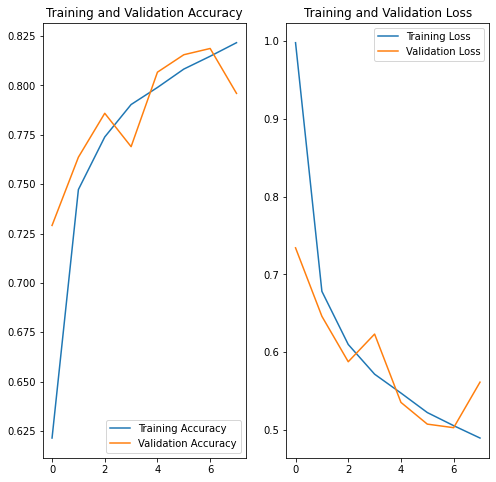

In [22]:
best_RC_f,best_RC_acti,best_NC_f,best_NC_acti,best_FL_acti = Decode_Genome(best_genome)
print(best_RC_f,best_RC_acti,best_NC_f,best_NC_acti,best_FL_acti)
Inference(best_RC_f,best_RC_acti,best_NC_f,best_NC_acti,best_FL_acti)